In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
from tabulate import tabulate

### Init Dataset

In [109]:
df = pd.read_csv("KC_housing_data.csv")
plt.style.use("seaborn-v0_8")
sns.set_palette("muted")

### Data Cleaning

In [110]:
df["date"] = pd.to_datetime(df["date"], errors="coerce")

df = df.drop_duplicates()

df = df[df["price"] > 50000]

print(df.columns)
print(df.isna().sum())

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64


### Summary Statistics

In [111]:
avg_price = df["price"].mean()
min_price = df["price"].min()
max_price = df["price"].max()

print(f"AVG price: {avg_price:,.0f}")
print(f"Min price: {min_price:,.0f}")
print(f"Max price: {max_price:,.0f}")

AVG price: 558,027
Min price: 80,000
Max price: 26,590,000


### Price Distribution

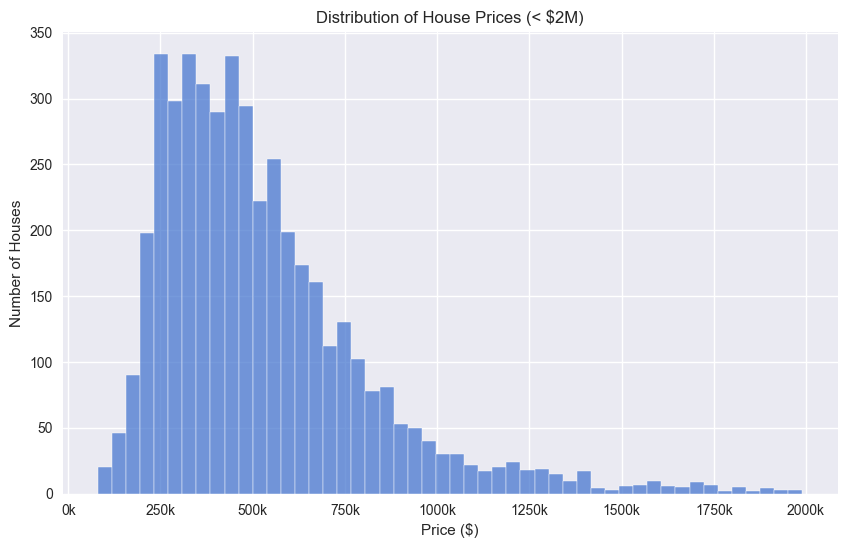

In [112]:
plt.figure(figsize=(10,6))
ax = sns.histplot(df[df["price"] < 2000000]["price"], bins=50, kde=False)
plt.title("Distribution of House Prices (< $2M)")
plt.xlabel("Price ($)")
plt.ylabel("Number of Houses")
ax.xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x/1000)}k'))
plt.show()

### Top 10 Cities by Average Price

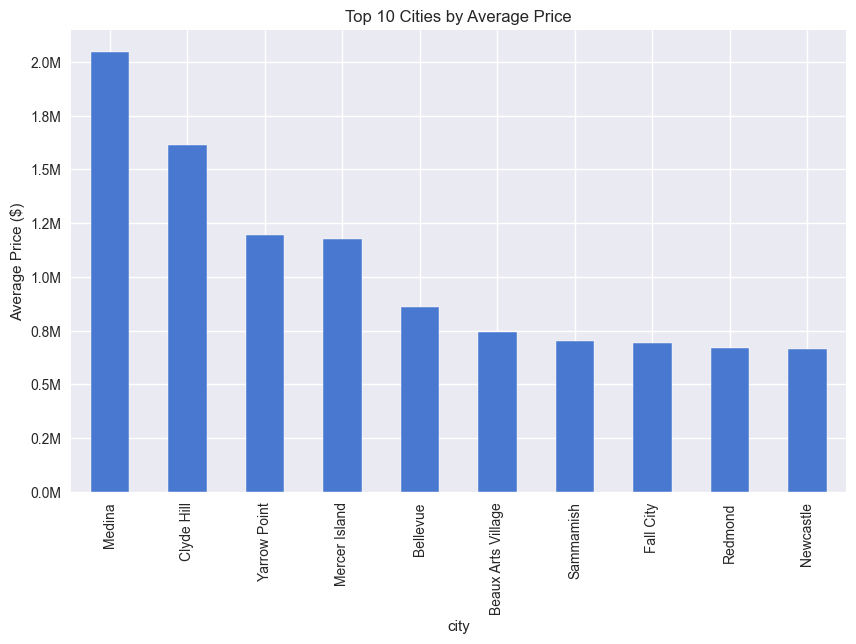

In [113]:
avg_price_city = df.groupby("city")["price"].mean().sort_values(ascending=False)
plt.figure(figsize=(10,6))
ax = avg_price_city.head(10).plot(kind="bar")
plt.title("Top 10 Cities by Average Price")
plt.ylabel("Average Price ($)")
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda y, _: f'{y/1e6:.1f}M'))
plt.show()

### Top 10 Cities by Average Price (Waterfront Homes)

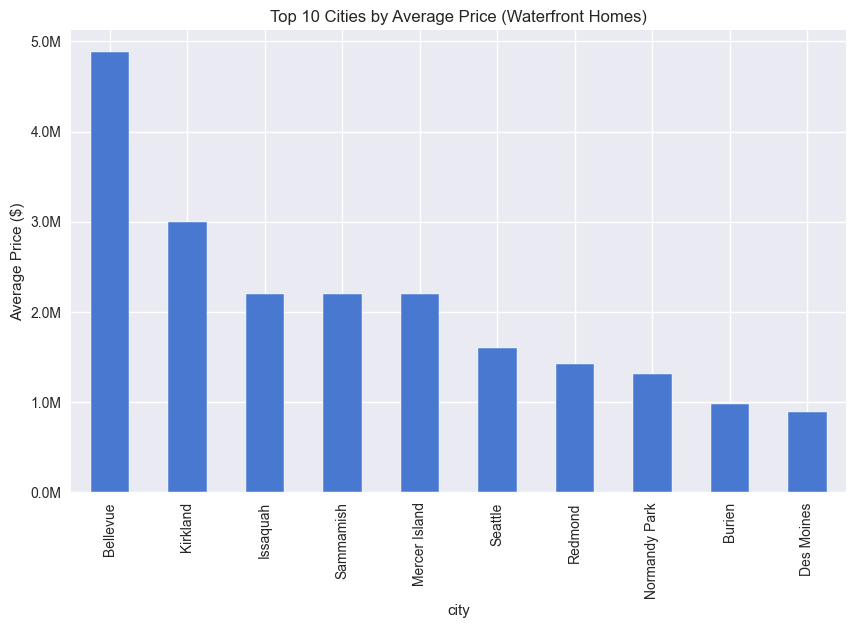

In [114]:
waterfront = df[df["waterfront"] == 1]
avg_price_waterfront = waterfront.groupby("city")["price"].mean().sort_values(ascending=False)

plt.figure(figsize=(10,6))
ax = avg_price_waterfront.head(10).plot(kind="bar")

plt.title("Top 10 Cities by Average Price (Waterfront Homes)")
plt.ylabel("Average Price ($)")
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda y, _: f'{y/1e6:.1f}M'))
plt.show()

### Price vs Living Space (Waterfront Homes)

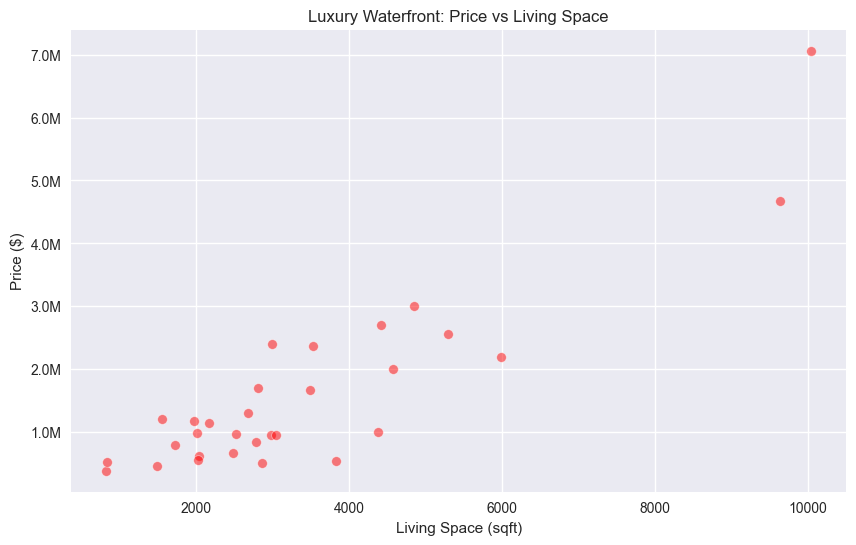

In [115]:
plt.figure(figsize=(10,6))
ax = sns.scatterplot(
    x="sqft_living",
    y="price",
    data=df[df["waterfront"] == 1],
    alpha=0.5,
    color="red"
)

plt.title("Luxury Waterfront: Price vs Living Space")
plt.xlabel("Living Space (sqft)")
plt.ylabel("Price ($)")
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda y, _: f'{y/1e6:.1f}M'))
plt.show()

### Top Luxury Waterfront Homes by Condition & Price

In [116]:
waterfront_homes = df[df["waterfront"] == 1]
waterfront_sorted = waterfront_homes.sort_values(by=["condition", "price"], ascending=[False, False])

table = waterfront_sorted[["price", "city", "sqft_living", "bedrooms", "bathrooms", "condition", "view", "yr_built"]].head(20)
table["price"] = table["price"].apply(lambda x: f"${x:,.0f}")
print(tabulate(table, headers="keys", tablefmt="pretty", showindex=False))

+------------+---------------+-------------+----------+-----------+-----------+------+----------+
|   price    |     city      | sqft_living | bedrooms | bathrooms | condition | view | yr_built |
+------------+---------------+-------------+----------+-----------+-----------+------+----------+
| $3,000,000 |   Kirkland    |    4850     |   4.0    |   4.25    |     5     |  4   |   1989   |
|  $947,500  |    Burien     |    2980     |   3.0    |   2.75    |     5     |  2   |   1917   |
|  $549,000  |    Vashon     |    2034     |   2.0    |    1.0    |     5     |  4   |   1947   |
| $1,700,000 |    Redmond    |    2810     |   3.0    |   2.75    |     4     |  4   |   1974   |
| $1,675,000 |    Seattle    |    3490     |   3.0    |    2.5    |     4     |  4   |   1939   |
| $1,200,000 | Mercer Island |    1560     |   3.0    |   1.75    |     4     |  4   |   1928   |
|  $950,000  |  Des Moines   |    3050     |   3.0    |   3.25    |     4     |  4   |   1962   |
|  $835,000  |  Des 

### Fresh & High-End Waterfront Homes (Condition + Price + Year + View)

In [117]:
waterfront_homes = df[df["waterfront"] == 1]
waterfront_sorted = waterfront_homes.sort_values(by=["condition", "price", "yr_built", "view"], ascending=[False, False, False, False])

table = waterfront_sorted[
    ["price", "city", "sqft_living", "bedrooms", "bathrooms", "condition", "view", "yr_built"]].head(10)
table["price"] = table["price"].apply(lambda x: f"${x:,.0f}")
print(tabulate(table, headers="keys", tablefmt="pretty", showindex=False))

+------------+---------------+-------------+----------+-----------+-----------+------+----------+
|   price    |     city      | sqft_living | bedrooms | bathrooms | condition | view | yr_built |
+------------+---------------+-------------+----------+-----------+-----------+------+----------+
| $3,000,000 |   Kirkland    |    4850     |   4.0    |   4.25    |     5     |  4   |   1989   |
|  $947,500  |    Burien     |    2980     |   3.0    |   2.75    |     5     |  2   |   1917   |
|  $549,000  |    Vashon     |    2034     |   2.0    |    1.0    |     5     |  4   |   1947   |
| $1,700,000 |    Redmond    |    2810     |   3.0    |   2.75    |     4     |  4   |   1974   |
| $1,675,000 |    Seattle    |    3490     |   3.0    |    2.5    |     4     |  4   |   1939   |
| $1,200,000 | Mercer Island |    1560     |   3.0    |   1.75    |     4     |  4   |   1928   |
|  $950,000  |  Des Moines   |    3050     |   3.0    |   3.25    |     4     |  4   |   1962   |
|  $835,000  |  Des 

### Potential Waterfront Development Candidates

In [118]:
potential_waterfront = df[
    (df["waterfront"] == 0) &
    (df["view"] >= 2) &
    (df["sqft_lot"] > 10000) &
    (df["condition"] <= 3)
]

potential_sorted = potential_waterfront.sort_values(by=["condition", "price", "yr_built", "view"], ascending=[False, False, False, False])

table = potential_sorted[
    ["price", "city", "sqft_living", "sqft_lot", "bedrooms", "bathrooms", "condition", "view", "yr_built"]
].head(10)

table["price"] = table["price"].apply(lambda x: f"${x:,.0f}")
table["sqft_living"] = table["sqft_living"].apply(lambda x: f"{x/1000:.1f}k sqft")
table["sqft_lot"] = table["sqft_lot"].apply(lambda x: f"{x/1000:.1f}k sqft")
print(tabulate(table, headers="keys", tablefmt="pretty", showindex=False))

+------------+---------------+-------------+-------------+----------+-----------+-----------+------+----------+
|   price    |     city      | sqft_living |  sqft_lot   | bedrooms | bathrooms | condition | view | yr_built |
+------------+---------------+-------------+-------------+----------+-----------+-----------+------+----------+
| $2,888,000 |    Seattle    |  8.7k sqft  | 64.0k sqft  |   5.0    |   6.25    |     3     |  4   |   1965   |
| $2,280,000 |    Redmond    | 13.5k sqft  | 307.8k sqft |   7.0    |    8.0    |     3     |  4   |   1999   |
| $2,180,000 |    Seattle    |  4.7k sqft  | 11.0k sqft  |   6.0    |   2.75    |     3     |  3   |   1931   |
| $1,901,000 | Yarrow Point  |  2.7k sqft  | 13.4k sqft  |   3.0    |    2.5    |     3     |  2   |   1992   |
| $1,795,000 | Mercer Island |  4.1k sqft  | 13.0k sqft  |   4.0    |   3.25    |     3     |  3   |   2000   |
| $1,730,000 | Mercer Island |  5.0k sqft  | 26.5k sqft  |   5.0    |    3.5    |     3     |  3   |   2

###  Market Timing - Average Waterfront Home Prices Over Time (Monthly)

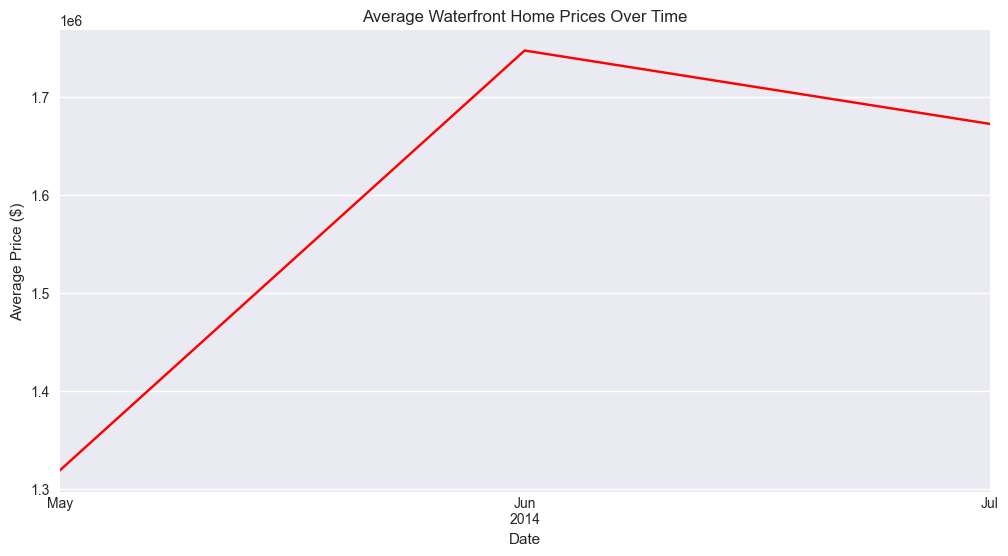

In [119]:
luxury = df[df["waterfront"] == 1].copy()
luxury["date"] = pd.to_datetime(luxury["date"], errors="coerce")

luxury["year_month"] = luxury["date"].dt.to_period("M")
monthly_price = luxury.groupby("year_month")["price"].mean()
plt.figure(figsize=(12,6))
monthly_price.plot(color="red")
plt.title("Average Waterfront Home Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Average Price ($)")
plt.show()